# Definition of Time Series Analysis
Following are the various components of the time series:

### Secular Trend or Simple trend or Long term movement: 
Secular trend refers to the general tendency of data to increase or decrease or stagnate over a long period of time. Time series relating to Economic, Business, and Commerce may show an upward or increasing tendency. Whereas, the time series relating to death rates, birth rates, share prices, etc. may show a downward or decreasing tendency.

### Seasonal variations:
Seasonal variations refer to the changes that take place due to the rhythmic forces which operate in a regular and periodic manner. These forces usually have the same or most similar pattern year after year. When we record data weekly, monthly or quarterly, we can see and calculate seasonal variations. Thus, when a time series consists of data only based on annual figures, there will be seen no seasonal variations. These variations may be due to seasons, weather conditions, habits, customs or traditions. For example, in summers the sale of ice-cream increases and at the time of Diwali the sale of diyas, crackers, etc. go up.

### Cyclical variations: 
Cyclical variations are due to the ups and downs recurring after a period from time to time. These are due to the business cycle and every organization has to phase all the four phases of a business cycle some time or the other. Prosperity or boom, recession, depression, and recovery are the four phases of a business cycle.

### Random or irregular variations: 
Random variations are fluctuations which are a result of unforeseen and unpredictable forces. These forces operate in an absolutely random or erratic manner and do not have any definite pattern. Thus, these variations may be due to floods, famines, earthquakes, strikes, etc.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,10]

In [2]:
df=pd.read_csv('halt_winters.csv',parse_dates=['date'])

In [3]:
df.head()

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


In [4]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [5]:
df.isnull().sum()

date     0
sales    0
dtype: int64

In [6]:
df=df.groupby('date').sum()
df.head()

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0


In [7]:
df.shape

(703, 1)

<AxesSubplot:xlabel='date'>

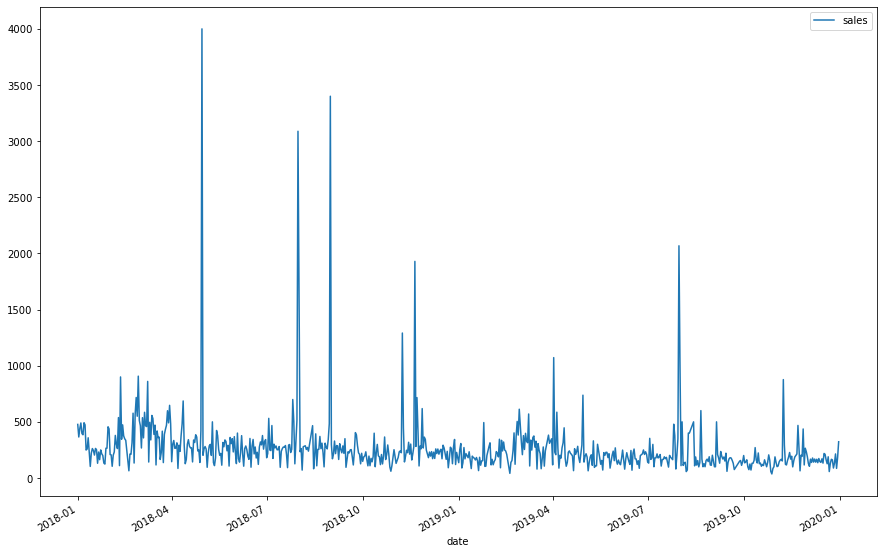

In [8]:
df.plot()

In [9]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
df=df.resample(rule='MS').sum() # rule & aggregation parameter

In [10]:
df.head()

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0


In [11]:
df.shape

(24, 1)

<AxesSubplot:xlabel='date'>

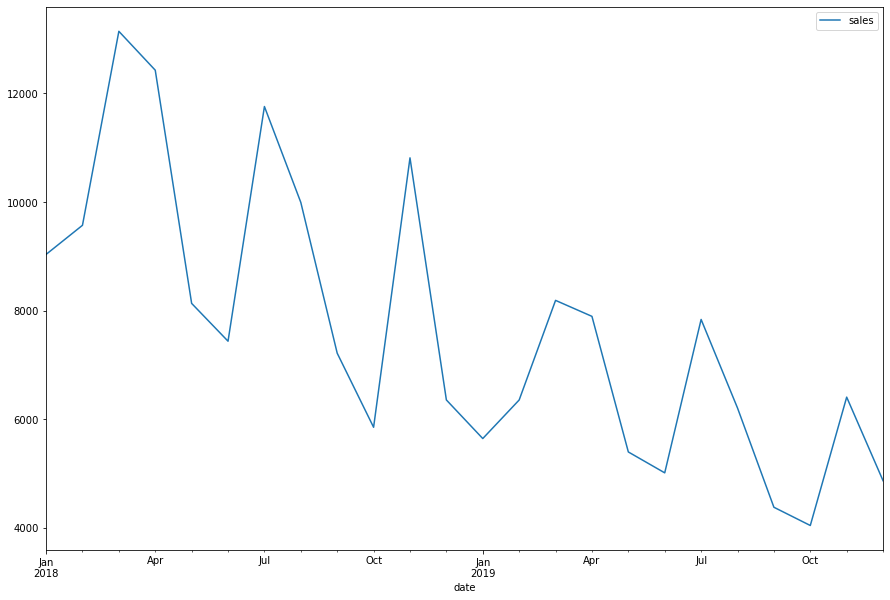

In [12]:
df.plot()

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

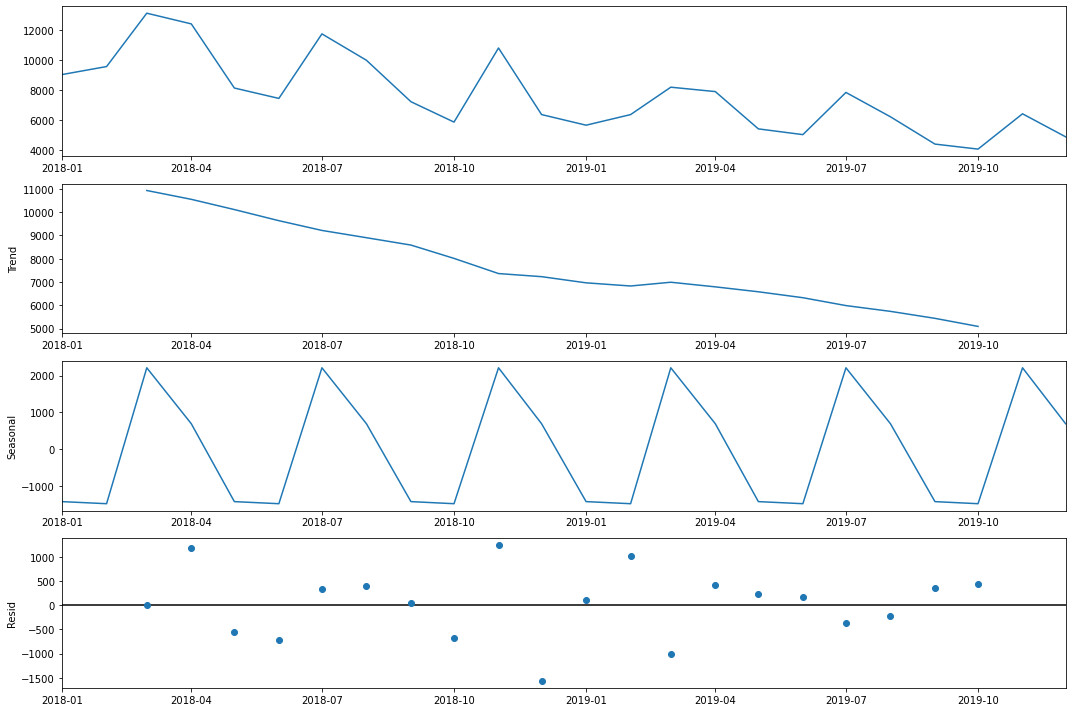

In [14]:
seasonal_decompose(df,model='additive',period=4).plot();

In [15]:
train=df[:19] #till Jul19
test=df[19:] # from aug19

In [16]:
train.tail()

,sales
date,
2019-03-01,8188.55
2019-04-01,7894.25
2019-05-01,5397.40
2019-06-01,5012.80
2019-07-01,7837.30


In [17]:
test

,sales
date,
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95
2019-12-01,4867.25


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
hwm=ExponentialSmoothing(train.sales,trend="add",seasonal="mul",seasonal_periods=4).fit()

In [21]:
test_forecast = hwm.forecast(5)
test_forecast

2019-08-01    6037.590783
2019-09-01    4129.778051
2019-10-01    3935.863902
2019-11-01    5995.398547
2019-12-01    4928.241588
Freq: MS, dtype: float64

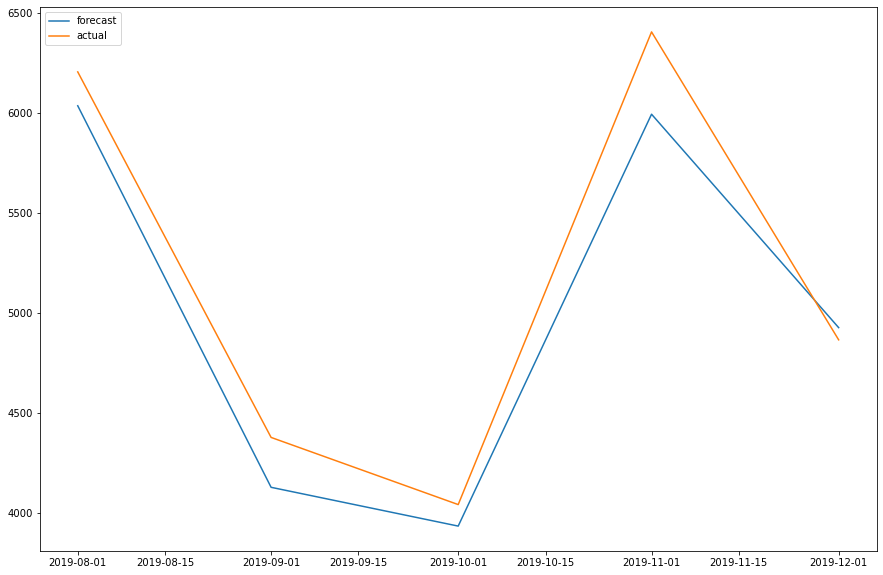

In [27]:
plt.plot(test_forecast,label="forecast")
plt.plot(test,label="actual")
plt.legend(loc=2)
plt.show()

<AxesSubplot:xlabel='date'>

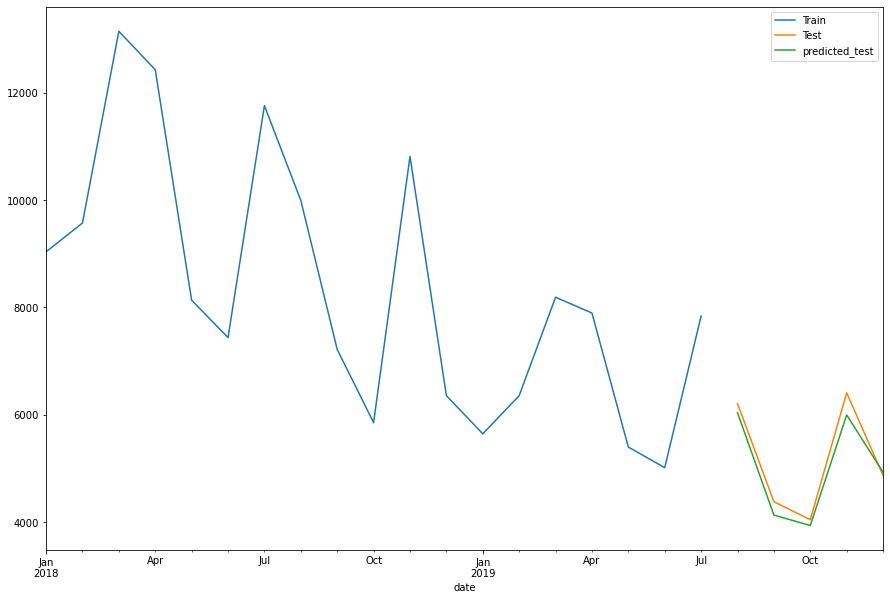

In [29]:
train['sales'].plot(legend=True, label='Train')
test['sales'].plot(legend=True, label='Test')

test_forecast.plot(legend=True, label='predicted_test')

In [30]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(test,test_forecast))

234.77865189207765

In [33]:
df.sales.mean(), np.sqrt(df.sales.var())  

(7665.204166666666, 2549.757117414906)

# rmse is mean within +- 1 sd , so model is good

In [35]:
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [36]:
pred=final_model.forecast(4)

In [37]:
pred

2020-01-01    3534.637212
2020-02-01    3329.399384
2020-03-01    4975.170897
2020-04-01    4032.719043
Freq: MS, dtype: float64

<AxesSubplot:xlabel='date'>

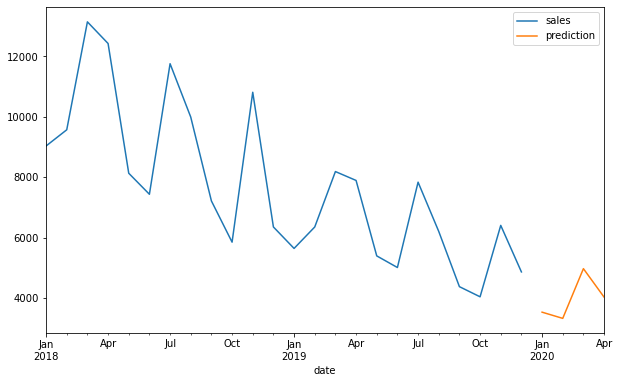

In [38]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')